In [1]:
import os
from dotenv import load_dotenv, find_dotenv
from os.path import join, dirname, basename, exists, isdir

### Load environmental variables from the project root directory ###
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

# now you can get the variables using their names

# Check whether a network drive has been specified
DATABASE = os.environ.get("NETWORK_URL")
if DATABASE == 'None':
    pass
else:
    pass
    #mount network drive here

# set up directory pathsa
CURRENT_DIR = os.getcwd()
PROJ = dirname(dotenv_path) # project root directory

DATA = join(PROJ, 'data') #data directory
RAW_EXTERNAL = join(DATA, 'raw_external') # external data raw directory
RAW_INTERNAL = join(DATA, 'raw_internal') # internal data raw directory
INTERMEDIATE = join(DATA, 'intermediate') # intermediate data directory
FINAL = join(DATA, 'final') # final data directory

RESULTS = join(PROJ, 'results') # output directory
FIGURES = join(RESULTS, 'figures') # figure output directory
PICTURES = join(RESULTS, 'pictures') # picture output directory


# make folders specific for certain data
folder_name = ''
if folder_name != '':
    #make folders if they don't exist
    if not exists(join(RAW_EXTERNAL, folder_name)):
        os.makedirs(join(RAW_EXTERNAL, folder_name))

    if not exists(join(INTERMEDIATE, folder_name)):
        os.makedirs(join(INTERMEDIATE, folder_name))

    if not exists(join(FINAL, folder_name)):
        os.makedirs(join(FINAL, folder_name))


print('Standard variables loaded, you are good to go!')

Standard variables loaded, you are good to go!


In [12]:
import pandas as pd
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
proteomics_dataset = f"{INTERMEDIATE}/proteomics/proteomics_concentrations.csv"
pca_df_all_proteomics_and_pyr = pd.read_csv(proteomics_dataset, index_col="UP")#.loc[df.index,:]
principalDf.index

Index(['lb', 'lb1', 'lb2', 'glucose', 'glucose1', 'glucose2', 'glycerolaa',
       'glycerolaa1', 'glycerolaa2', 'acetate', 'acetate1', 'acetate2',
       'fumarate', 'fumarate1', 'fumarate2', 'glucosamine', 'glucosamine1',
       'glucosamine2', 'glycerol', 'glycerol1', 'glycerol2', 'pyruvate',
       'pyruvate1', 'pyruvate2', 'chemostatµ05', 'chemostatµ051',
       'chemostatµ052', 'chemostatµ035', 'chemostatµ0351', 'chemostatµ0352',
       'chemostatµ020', 'chemostatµ0201', 'chemostatµ0202', 'chemostatµ012',
       'chemostatµ0121', 'chemostatµ0122', 'stationary1day', 'stationary1day1',
       'stationary1day2', 'stationary3days', 'stationary3days1',
       'stationary3days2', 'glucose3', 'glucose4', 'glucose5', '50mmnacl',
       '50mmnacl1', '50mmnacl2', '42c', '42c1', '42c2', 'ph6', 'ph61', 'ph62',
       'xylose', 'xylose1', 'xylose2', 'mannose', 'mannose1', 'mannose2',
       'galactose', 'galactose1', 'galactose2', 'succinate', 'succinate1',
       'succinate2', 'fructose', 'f

/Library/Python/3.7/site-packages/pandas/core/indexing.py:961 FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


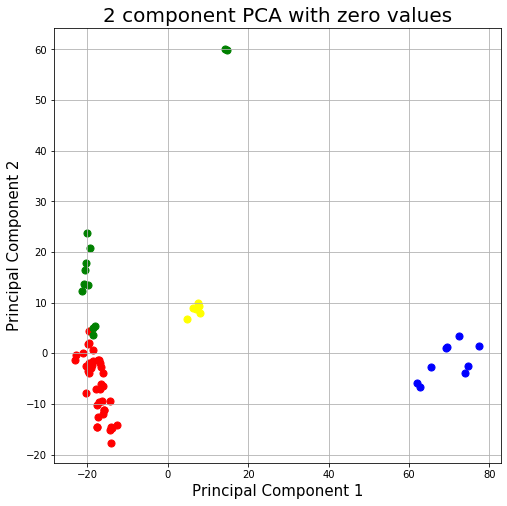

In [37]:
from sklearn.preprocessing import StandardScaler

# standardize data for pca 
# #features = ['sepal length', 'sepal width', 'petal length', 'petal width']# Separating out the features
pca_df_all_proteomics_and_pyr = pd.read_csv(proteomics_dataset, index_col="UP")#.loc[df.index,:]

#pca_df_all_proteomics_and_pyr['pyr_1'] = abs_usages_1
pca_df_all_proteomics_and_pyr = pca_df_all_proteomics_and_pyr.T.dropna(axis='columns')
x = pca_df_all_proteomics_and_pyr.values
x = StandardScaler().fit_transform(x)

# run pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.index = pca_df_all_proteomics_and_pyr.index


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA with zero values', fontsize = 20)

# colors with the whole thing going on
carbon_sources = [principalDf.index[i] for i in list(range(0,len(principalDf.index), 3))]
carbon_sources = ['lb','glucose', 'glycerolaa', 'acetate', 'fumarate',\
                  'glucosamine', 'glycerol', 'pyruvate', 'xylose',\
                  'mannose', 'galactose', 'succinate', 'fructose']
chemostats = ['chemostatµ05', 'chemostatµ035', 'chemostatµ020', 'chemostatµ012']
stress = [ '50mmnacl', '42c', 'ph6']
stationary = ['stationary1day', 'stationary3days']
conditions = [carbon_sources, chemostats, stress, stationary]
colors = ["red", "green", "blue", "yellow"]

amount = len(principalDf.index)
# for i in range(amount):
#     c = [float(i)/float(amount), 0.0, float(amount-i)/float(amount)] #R,G,B
#     ax.scatter(principalDf.loc[principalDf.index[i], 'principal component 1']
#            , principalDf.loc[principalDf.index[i], 'principal component 2']
#            , color = c 
#            , s = 50)
# ax.scatter(principalDf.loc["pyruvate1", 'principal component 1']
#            , principalDf.loc[principalDf.index[i], 'principal component 2']
#            , color = "green"
#            , s = 50)
j = 0
for i in conditions:
    cur_list = 
    i.extend([k + "1" for k in i])
    i.extend([l + "2" for l in i])
    ax.scatter(principalDf.loc[i, 'principal component 1']
           , principalDf.loc[i, 'principal component 2']
           , color = colors[j]
           , s = 50)
    j += 1


#ax.legend(pca_df_all_proteomics_and_pyr.index)
ax.grid()
#plt.savefig(f'{FIGURES}/')


In [36]:
chemostats.extend()
chemostats

['chemostatµ05',
 'chemostatµ035',
 'chemostatµ020',
 'chemostatµ012',
 'chemostatµ051',
 'chemostatµ0351',
 'chemostatµ0201',
 'chemostatµ0121',
 'chemostatµ051',
 'chemostatµ0351',
 'chemostatµ0201',
 'chemostatµ0121',
 'chemostatµ0511',
 'chemostatµ03511',
 'chemostatµ02011',
 'chemostatµ01211']